In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [2]:
df=pd.read_csv('FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
cdf=df[['ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,9.9,8.5,196
1,2.4,11.2,9.6,221
2,1.5,6.0,5.9,136
3,3.5,12.7,11.1,255
4,3.5,12.1,10.6,244


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029F2B77E6D0>,
      dtype=object)

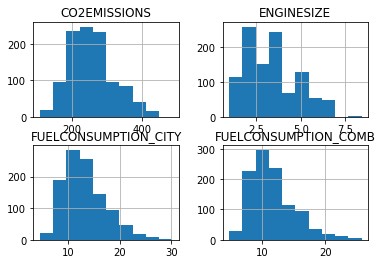

In [4]:
cdf.hist()

In [5]:
msk=np.random.rand(len(cdf))<.6
train=cdf[msk]
test=cdf[~msk]

In [10]:
train_x=np.asanyarray(train[['ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB']])
test_x=np.asanyarray(test[['ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB']])

In [9]:
train_y=np.asanyarray(train[['CO2EMISSIONS']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])

In [11]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [12]:
lr.fit(train_x,train_y)

LinearRegression()

In [13]:
lr.coef_

array([[19.78764089,  1.54534783,  7.41928564]])

In [16]:
pred_y=lr.predict(test_x)

In [17]:
from sklearn.metrics import r2_score
print(r2_score(test_y,pred_y))

0.8704945833386805
